In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'day 11'))
	print(os.getcwd())
except:
	pass

In [2]:
from computerrefractored import Computer
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [3]:
from collections import namedtuple
def dimensions(obj):
    minim = min(obj,key = lambda x:x[0])[0], min(obj,key = lambda x:x[1])[1] # mins for x and y|
    maxim = max(obj,key = lambda x:x[0])[0], max(obj,key = lambda x:x[1])[1] # max for dimensions
    ranges = (maxim[0] - minim[0]+1, maxim[1] - minim[1]+1)
    Dim = namedtuple('Dim',['min','max','ranges'])
    res = Dim(minim,maxim,ranges)
    return res

def normalize(obj):
    dim = dimensions(obj)
    return [(o[0]-dim.min[0],o[1]-dim.min[1]) for o in obj]

In [4]:
class Grid():
    def __init__(self):
        self.x,self.y = 0,0
        self.visited = defaultdict(int)
        self.visited[(0,0)]=1
        self.color = defaultdict(int)
        self.orientation = {
            'up':(0,1),
            'left':(-1,0),
            'down':(0,-1),
            'right':(1,0)
        }
        self.cur_orient = 'up'

    def paint(self,color_to_paint):
        self.color[(self.x,self.y)]=color_to_paint
    def get_color(self):
        return self.color[(self.x,self.y)]
    def get_location(self):
        return (self.x,self.y)
    def move(self):
        dx,dy = self.orientation[self.cur_orient]
        self.x += dx
        self.y += dy
        self.visited[(self.x,self.y)]=1 
    def turn(self,turn):
        if turn == 0:
            if self.cur_orient=='up':self.cur_orient='left'
            elif self.cur_orient=='down':self.cur_orient='right'
            elif self.cur_orient=='left':self.cur_orient='down'
            elif self.cur_orient=='right':self.cur_orient='up'
        if turn == 1:
            if self.cur_orient=='up':self.cur_orient='right'
            elif self.cur_orient=='down':self.cur_orient='left'
            elif self.cur_orient=='left':self.cur_orient='up'
            elif self.cur_orient=='right':self.cur_orient='down'

In [5]:
noun, verb = 0,0
f=open('input.txt').read()
memory = tuple(int(i) for i in f.split(',')) # let's make it immutable as a tuple
memsize = 100000
memory = tuple(list(memory)+[0]*memsize)
c = Computer(list(memory),noun,verb,[1])

grid = Grid()
def walk():
    current_color = grid.get_color()
    c.receiveinput(current_color)
    color_to_paint = c.run()
    if color_to_paint == 0 or color_to_paint != 0:
        turn = c.run()
        grid.paint(color_to_paint)
        grid.turn(turn)
        grid.move()
    # print(f'cur location{grid.get_location()},current_color{current_color},color_to_paint{color_to_paint},turn{turn},{grid.cur_orient}')

def traverse():
    cur = 1
    while cur !=(0,0) and c.running:
        walk()
        cur = grid.get_location()
traverse()
sum([v for v in grid.visited.values()])

opcode 99 computer finished


2720

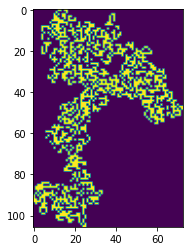

In [6]:
whites = [k for k,v in grid.color.items() if v == 1 ]
dim = dimensions(whites)
whites = normalize(whites)

pic = np.zeros(dim.ranges[0]*dim.ranges[1]).reshape(dim.ranges[0],dim.ranges[1])
for w in whites: pic[w]=1
from matplotlib import pyplot as plt
plt.imshow(pic)

opcode 99 computer finished


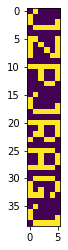

In [7]:
# part 2
c = Computer(list(memory),noun,verb,[1])
grid = Grid()
grid.color[(0,0)]=1 # line added
traverse()

whites = [k for k,v in grid.color.items() if v == 1 ]
dim = dimensions(whites)
whites = normalize(whites)

pic = np.zeros(dim.ranges[0]*dim.ranges[1]).reshape(dim.ranges[0],dim.ranges[1])
for w in whites: pic[w]=1
from matplotlib import pyplot as plt
plt.imshow(pic)